<h1> Loan EDA analysis</h1>

This report details the steps taken to preprocess and analyze the dataset provided in 'Loan_dataset .csv'. 
The main objectives of this analysis are to clean the data, handle null values and outliers, and perform exploratory data analysis (EDA) to derive meaningful insights.

<h3>Importing The Necessary Libraries</h3>


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

<h2>Importing The Dataset</h2>

The first step in our data preprocessing involved loading the original CSV file(loan_dataset.csv) into a Pandas DataFrame.
This was followed by creating a copy of this DataFrame, named df_filled, which was used for filling null values.
The initial inspection included checking the structure, summary statistics, and identifying columns with null values.

In [2]:
# Loading the original CSV file
df = pd.read_csv('Loan_dataset .csv')

In [3]:
# Creating a copy of the dataframe to fill null values
df_filled = df.copy()

<h1>Checking For Null Values In Dataset</h1>

After identifying the columns with null values and their respective counts, various strategies were employed to handle them:

•Dependents: Null values were replaced with 0. This decision was based on the assumption that missing values in this context likely indicate no dependents.

•Loan Sanction Amount (USD): Null values were interpolated linearly to maintain the sequence and trends in the data.

•Credit Score: Null values were filled with the mean value. This method was chosen after plotting histograms and boxplots to check for skewness, ensuring the mean was an appropriate measure.

•Property Location: Null values were filled with 'Undisclosed' to indicate missing data without making assumptions.

•Current Loan Expenses (USD) and Income (USD): Null values were filled with the median value. The median was chosen after assessing skewness to avoid the influence of outliers.

•Type of Employment: Null values were filled based on Profession using a mapping dictionary to ensure logical consistency.

•Has Active Credit Card and Income Stability: Null values were filled with 'Not Active' and 'Unrecorded' respectively to indicate missing information without making assumptions.

•Property Age: Null values were filled with the mean of Income (USD), assuming a relationship between income and property age.

•Gender: Rows with null values in the Gender column were dropped to maintain the integrity of gender-related analyses


In [4]:
# Identifing columns with null values and their counts
null_counts = df.isnull().sum().sort_values(ascending=False)
print(null_counts)


Type of Employment             7270
Property Age                   4850
Income (USD)                   4576
Dependents                     2493
Credit Score                   1703
Income Stability               1683
Has Active Credit Card         1566
Property Location               356
Loan Sanction Amount (USD)      340
Current Loan Expenses (USD)     172
Gender                           53
Age                               0
Profession                        0
Customer ID                       0
Name                              0
Location                          0
No. of Defaults                   0
Expense Type 2                    0
Loan Amount Request (USD)         0
Expense Type 1                    0
Property Type                     0
Property ID                       0
Co-Applicant                      0
Property Price                    0
dtype: int64


<h2>Removing Null Values With Different Methods</h2>

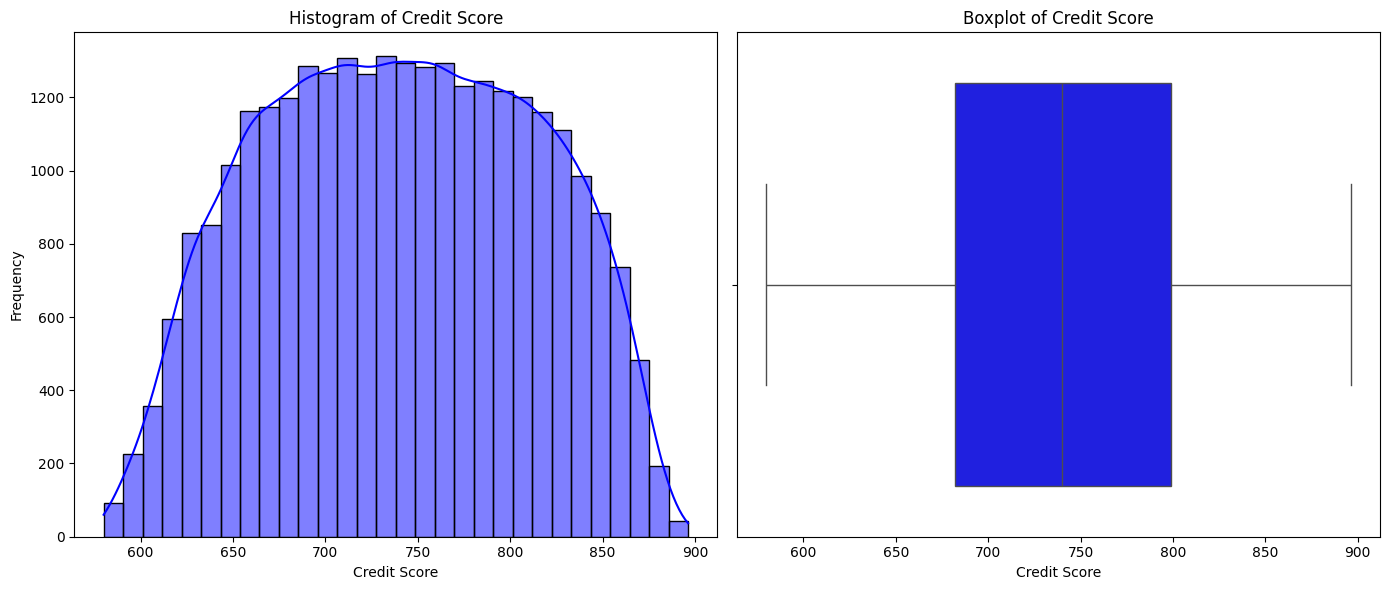

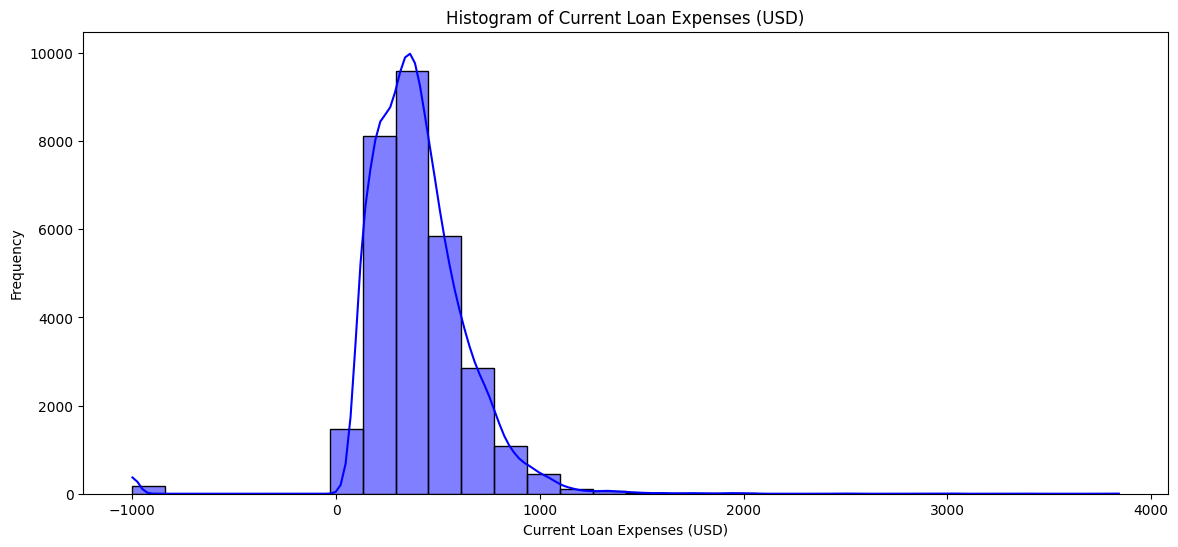

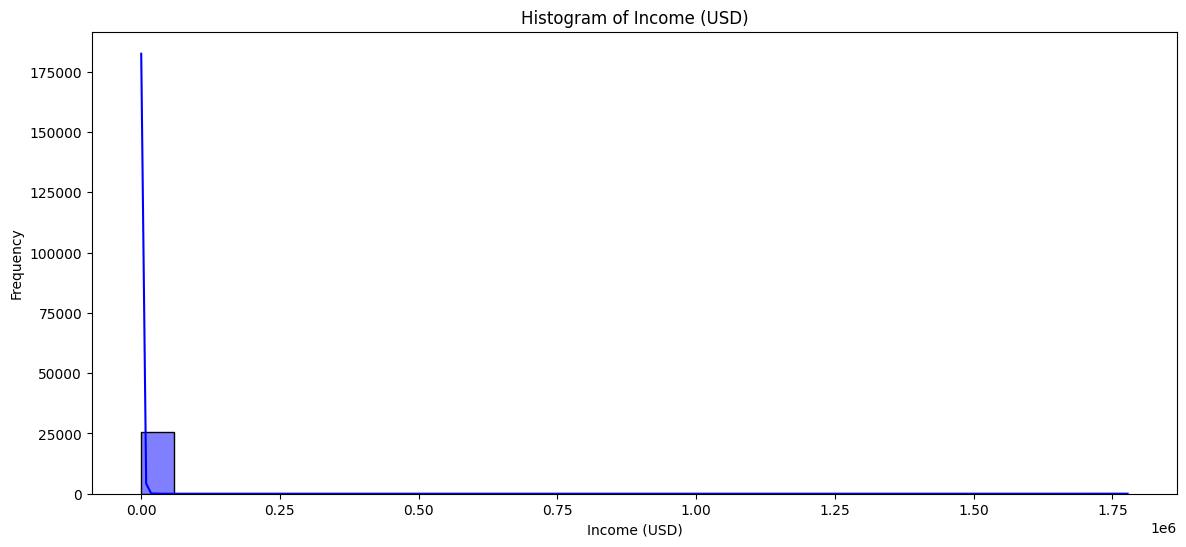

New CSV file with null values removed has been created: Loan_null_removed.csv


In [5]:
# Filling null values with appropriate methods
df_filled['Dependents'] = df_filled['Dependents'].fillna(value=0) # Wherever Dependents values are null it will fill '0' at null places.
df_filled['Loan Sanction Amount (USD)'] = df_filled['Loan Sanction Amount (USD)'].interpolate(method='linear')

# Plotting the histogram and boxplot for Credit Score to check for skewness
plt.figure(figsize=(14, 6))
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Credit Score'].dropna(), kde=True, bins=30, color='blue')
plt.title('Histogram of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Credit Score'].dropna(), color='blue')
plt.title('Boxplot of Credit Score')
plt.xlabel('Credit Score')
plt.tight_layout()
plt.show()

# After checking the skewness we will fill null values for Credit Score using mean
df_filled['Credit Score'] = df_filled['Credit Score'].fillna(df_filled['Credit Score'].mean())

# Fill null values for Property Location using mode
df_filled['Property Location'] = df_filled['Property Location'].fillna('Undisclosed')

# Plotting the histogram for Current Loan Expenses
plt.figure(figsize=(14, 6))
sns.histplot(df['Current Loan Expenses (USD)'].dropna(), kde=True, bins=30, color='blue')
plt.title('Histogram of Current Loan Expenses (USD)')
plt.xlabel('Current Loan Expenses (USD)')
plt.ylabel('Frequency')
plt.show()

#  After checking the skewness we will fill null values for Current Loan Expenses using median
df_filled['Current Loan Expenses (USD)'] = df_filled['Current Loan Expenses (USD)'].fillna(df_filled['Current Loan Expenses (USD)'].median())

# Plotting the histogram for Income (USD)
plt.figure(figsize=(14, 6))
sns.histplot(df['Income (USD)'].dropna(), kde=True, bins=30, color='blue')
plt.title('Histogram of Income (USD)')
plt.xlabel('Income (USD)')
plt.ylabel('Frequency')
plt.show()

#  After checking the skewness we will fill null values for Income (USD) using median
df_filled['Income (USD)'] = df_filled['Income (USD)'].fillna(df_filled['Income (USD)'].median())

# Define the mapping based on the Profession
employment_mapping = {
    'Student': 'Free Lancer',
    'Commerical associate': 'Private Employee',
    'Unemployed': 'Not Working',
    'state servant': 'Government Servant',
    'Maternity leave': 'Unknown',
    'Pensioner': 'Retired',
    'Working': 'Unspecified',
    'Buiesnessman': 'self employed'
}

# Function to apply the mapping and capitalize the first letter of each word
def map_employment_and_title_case(row):
    if pd.isnull(row['Type of Employment']):
        profession = row['Profession']
        if isinstance(profession, str):
            mapped_value = employment_mapping.get(profession.lower(), 'Unspecified')
            if isinstance(mapped_value, str):
                return mapped_value.title()
        return 'Unspecified'
    return row['Type of Employment']

# Apply the mapping function to 'Type of Employment' column
df_filled['Type of Employment'] = df_filled.apply(map_employment_and_title_case, axis=1)

# Fill other categorical null values
df_filled['Has Active Credit Card'] = df_filled['Has Active Credit Card'].fillna('Not Active')
df_filled['Income Stability'] = df_filled['Income Stability'].fillna('Unrecorded')
df_filled['Property Age'] = df_filled['Property Age'].fillna(df_filled['Income (USD)'].mean())

# Drop rows where 'Gender' column has null values
df_filled = df_filled.dropna(subset=['Gender'])

# Save the new dataframe with filled null values to a new CSV file
df_filled.to_csv('Loan_null_removed.csv', index=False)

print("New CSV file with null values removed has been created: Loan_null_removed.csv")


<h1>Removing The Outlier</h1>
By defining the IQR Method 


•	The new CSV file 'Loan_null_removed.csv' is loaded.

•	Numerical columns are identified for outlier handling.


In [6]:
# Loading the new CSV file with null values removed
df_cleaned = pd.read_csv('Loan_null_removed.csv')

# Identifing numerical columns
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Creating the function to handle outliers by replacing them with the mean value
def handle_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        mean_value = df[col].mean()
        
        df[col] = df[col].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
    return df

# Handle outliers in the cleaned dataframe
df_cleaned = handle_outliers_iqr(df_cleaned, numerical_columns)

<h2> Removing Outlier Of Numerical Columns </h2>

Outliers are handled using the IQR (Interquartile Range) method:

•	Outliers in each numerical column are replaced with the mean value if they fall outside the bounds.

•	Outliers are detected, displayed, and removed for specific columns.


The final cleaned DataFrame with handled outliers is saved to 'Loan_final_cleaned.csv'.



In [7]:

# Define the numerical column for outlier detection and handling
numerical_columns_for_detection = [
    'Credit Score', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
    'Property ID', 'Property Age', 'Property Type', 'Loan Sanction Amount (USD)', 'Co-Applicant'
]

for numerical_column in numerical_columns_for_detection:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the numerical column
    Q1 = df_cleaned[numerical_column].quantile(0.25)
    Q3 = df_cleaned[numerical_column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df_cleaned[(df_cleaned[numerical_column] < lower_bound) | (df_cleaned[numerical_column] > upper_bound)]

    # Display the outliers
    print(f"Outliers in {numerical_column}:")
    print(outliers)

    # Remove outliers
    df_cleaned = df_cleaned[(df_cleaned[numerical_column] >= lower_bound) & (df_cleaned[numerical_column] <= upper_bound)]

# Save the final cleaned dataframe with outliers handled to a new CSV file
df_cleaned.to_csv('Loan_final_cleaned.csv', index=False)

print("Final cleaned CSV file with null values removed and outliers handled has been created: Loan_final_cleaned.csv")

Outliers in Credit Score:
Empty DataFrame
Columns: [Customer ID, Name, Gender, Age, Income (USD), Income Stability, Profession, Type of Employment, Location, Loan Amount Request (USD), Current Loan Expenses (USD), Expense Type 1, Expense Type 2, Dependents, Credit Score, No. of Defaults, Has Active Credit Card, Property ID, Property Age, Property Type, Property Location, Co-Applicant, Property Price, Loan Sanction Amount (USD)]
Index: []

[0 rows x 24 columns]
Outliers in Loan Amount Request (USD):
      Customer ID              Name Gender  Age  Income (USD)  \
29        C-39879  Thea Rodenberger      M   29   3880.490000   
285       C-19195       Kena Ankrom      F   19   2568.788098   
298       C-33465       Cami Wymore      F   55   3065.860000   
304        C-1050      Yang Saylors      F   23   2577.920000   
327        C-1990   Marlena Tibbets      F   45   4100.410000   
...           ...               ...    ...  ...           ...   
29502       C-818     Jenni Hargett      

<h3>Again Checking for the null values (If any left)</h3>

In [8]:
dfn = pd.read_csv('Loan_final_cleaned.csv')
null_counts = df.isnull().sum().sort_values(ascending=False)
print(null_counts)

Type of Employment             7270
Property Age                   4850
Income (USD)                   4576
Dependents                     2493
Credit Score                   1703
Income Stability               1683
Has Active Credit Card         1566
Property Location               356
Loan Sanction Amount (USD)      340
Current Loan Expenses (USD)     172
Gender                           53
Age                               0
Profession                        0
Customer ID                       0
Name                              0
Location                          0
No. of Defaults                   0
Expense Type 2                    0
Loan Amount Request (USD)         0
Expense Type 1                    0
Property Type                     0
Property ID                       0
Co-Applicant                      0
Property Price                    0
dtype: int64


<h1>Exploratory Data Analysis (EDA)</h1>


<h2> Performing The Univar Analysis</h2>
By Using Different Graphs

<h4>Histograms:</h4>

Histograms are ideal for visualizing the distribution of numerical columns as they provide a clear view of the frequency of data points within specified ranges. This helps identify patterns, skewness, and outliers.

Histograms for various numerical columns are plotted to visualize the distribution:

•	Age: To understand the distribution of borrowers' ages.

•	Income (USD): To observe the spread and central tendency of income values.

•	Credit Score: To identify the distribution and detect any anomalies in credit scores.

•	Current Loan Expenses (USD) : To analyze the spread of current loan expenses among borrowers.

•	Loan Amount Request (USD): To see the distribution of requested loan amounts.

•	Loan Sanction Amount (USD): To visualize how loan sanction amounts are distributed.

•	Property Price: To understand the range and frequency of property prices.


<h4>Density Plot:</h4>

Density plot provides a smoothed representation of the data distribution, making it easier to observe the overall shape and identify any potential skewness.

•	Property Age: To visualize the distribution of property ages in a smoothed manner.

<h4>Pie Charts:</h4>

Pie charts are effective for showing the proportionate distribution of categorical columns, making it easy to compare the relative sizes of different categories.

•	Gender: To illustrate the gender distribution of borrowers.

•	Income Stability: To show the proportion of borrowers with stable vs. unstable income.

•	Has Active Credit Card: To display the proportion of borrowers with active credit cards.

•	Property Type: To depict the distribution of different property types among borrowers.


 

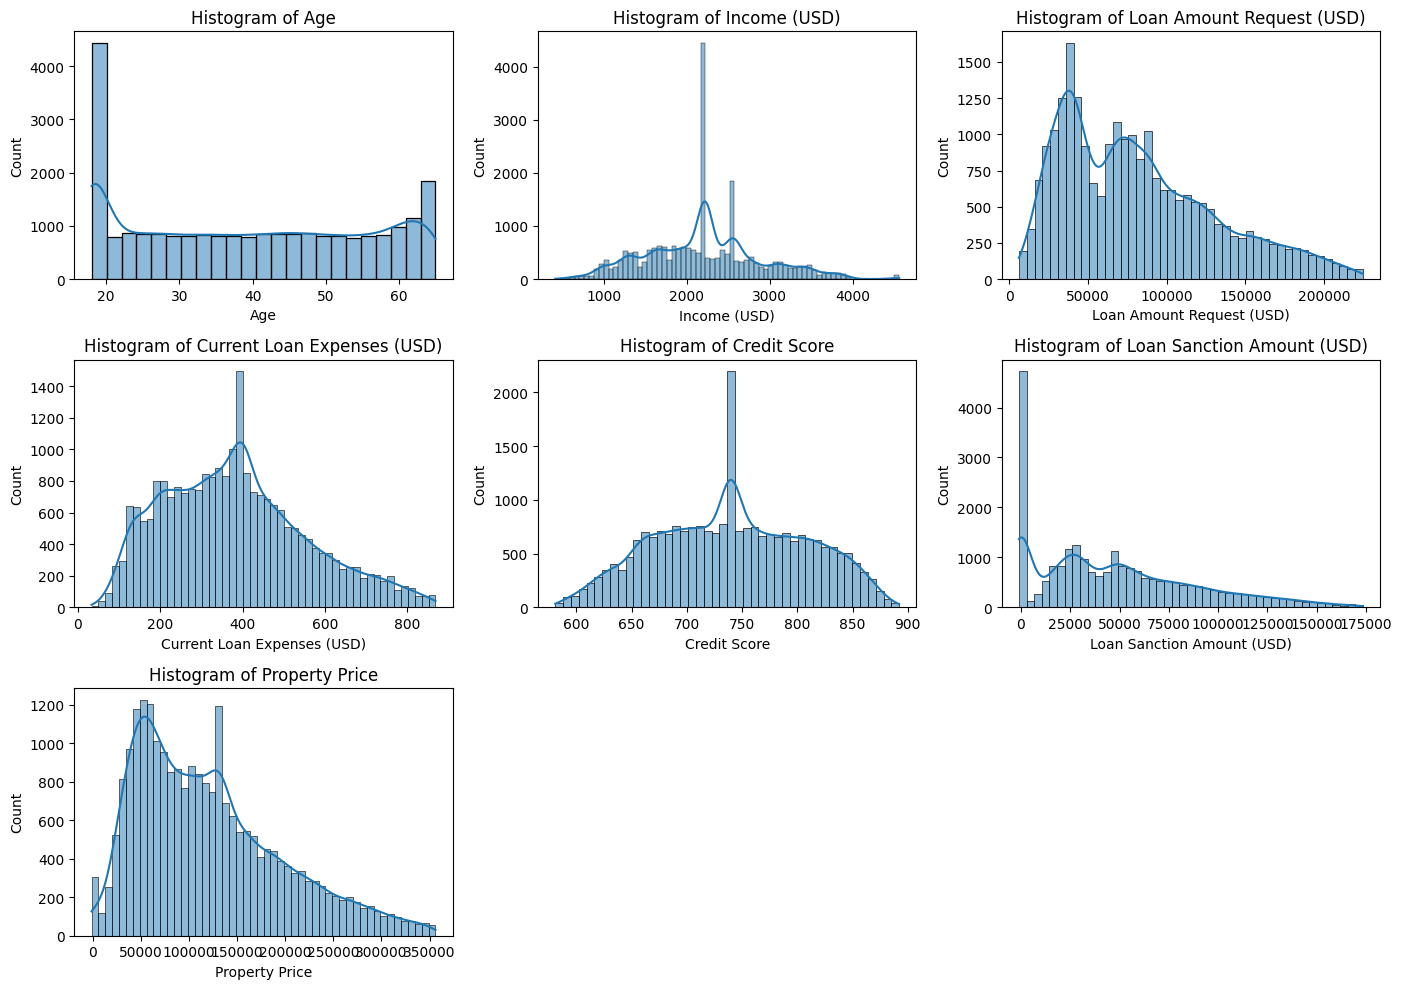

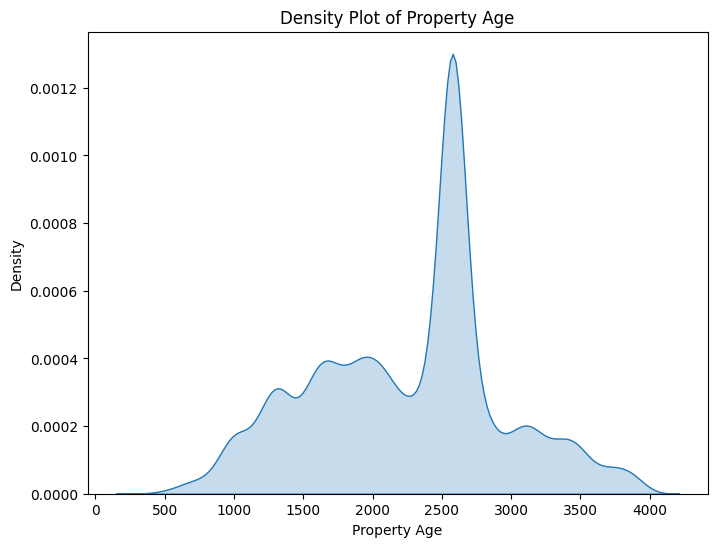

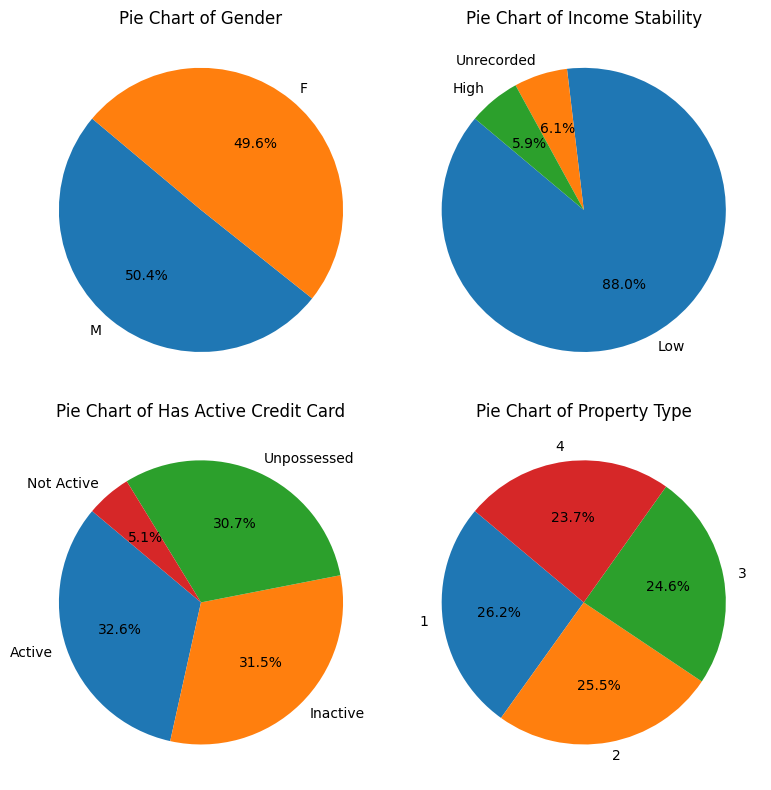

In [ ]:
# Load the cleaned dataset
df = pd.read_csv('Loan_final_cleaned.csv')

# Univariate Analysis

# Histogram
plt.figure(figsize=(14, 10))

# Age
plt.subplot(3, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Histogram of Age')

# Income (USD)
plt.subplot(3, 3, 2)
sns.histplot(df['Income (USD)'], kde=True)
plt.title('Histogram of Income (USD)')

# Loan Amount Request (USD)
plt.subplot(3, 3, 3)
sns.histplot(df['Loan Amount Request (USD)'], kde=True)
plt.title('Histogram of Loan Amount Request (USD)')

# Current Loan Expenses (USD)
plt.subplot(3, 3, 4)
sns.histplot(df['Current Loan Expenses (USD)'], kde=True)
plt.title('Histogram of Current Loan Expenses (USD)')

# Credit Score
plt.subplot(3, 3, 5)
sns.histplot(df['Credit Score'], kde=True)
plt.title('Histogram of Credit Score')

# Loan Sanction Amount (USD)
plt.subplot(3, 3, 6)
sns.histplot(df['Loan Sanction Amount (USD)'], kde=True)
plt.title('Histogram of Loan Sanction Amount (USD)')

# Property Price
plt.subplot(3, 3, 7)
sns.histplot(df['Property Price'], kde=True)
plt.title('Histogram of Property Price')

plt.tight_layout()
plt.show()

# Density Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Property Age'], fill=True)
plt.title('Density Plot of Property Age')
plt.xlabel('Property Age')
plt.ylabel('Density')
plt.show()

# Pie Chart
plt.figure(figsize=(8,8))

# Gender
plt.subplot(2, 2, 1)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, startangle=140, autopct='%1.1f%%')
plt.title('Pie Chart of Gender')

# Income Stability
plt.subplot(2, 2, 2)
income_stability_counts = df['Income Stability'].value_counts()
plt.pie(income_stability_counts, labels=income_stability_counts.index, startangle=140, autopct='%1.1f%%')
plt.title('Pie Chart of Income Stability')

# Has Active Credit Card
plt.subplot(2, 2, 3)
active_credit_card_counts = df['Has Active Credit Card'].value_counts()
plt.pie(active_credit_card_counts, labels=active_credit_card_counts.index, startangle=140, autopct='%1.1f%%')
plt.title('Pie Chart of Has Active Credit Card')

# Property Type
plt.subplot(2, 2, 4)
property_type_counts = df['Property Type'].value_counts()
plt.pie(property_type_counts, labels=property_type_counts.index, startangle=140, autopct='%1.1f%%')
plt.title('Pie Chart of Property Type')

plt.tight_layout()
plt.show()

<h2>Performing The Bivar Analysis</h2>
Between the co-realted columns 


<h4>Scatter Plots:</h4>

Scatter plots are used to explore relationships between pairs of variables. They help identify correlations, trends, and potential outliers.

•	Income vs Loan Amount Request: To examine the relationship between income and requested loan amount.

•	Income vs Loan Sanction Amount: To explore how income correlates with the sanctioned loan amount.

•	Credit Score vs Loan Amount Request: To see if there is a trend between credit score and requested loan amount.

•	Credit Score vs Loan Sanction Amount: To investigate the relationship between credit score and sanctioned loan amount.

•	Income vs Credit Score: To identify any correlation between income and credit score.


<h4>Bar Plots:</h4>

Bar plots are useful for visualizing relationships between categorical and numerical variables, as they show the average value of the numerical variable for each category

•	Loan Sanction Amount (USD) by Property Location: To compare the average loan sanction amount across different property locations.

•	Income (USD) by Type of Employment: To observe how income varies by employment type.

•	Loan Amount Request (USD) by Profession: To see the differences in loan amount requests across various professions.




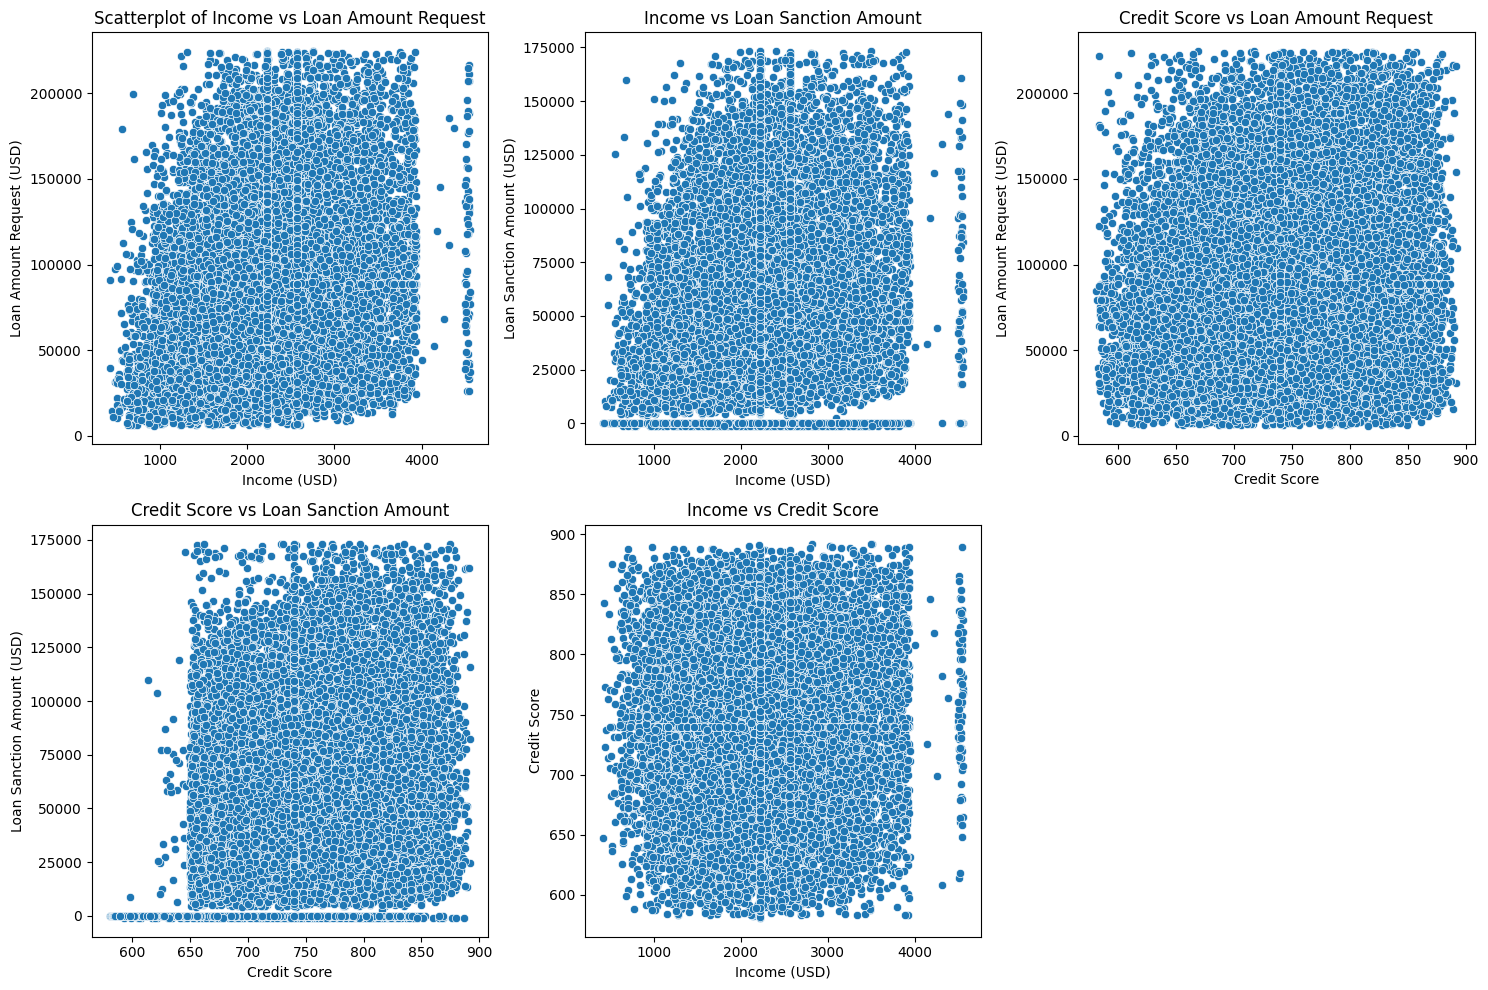

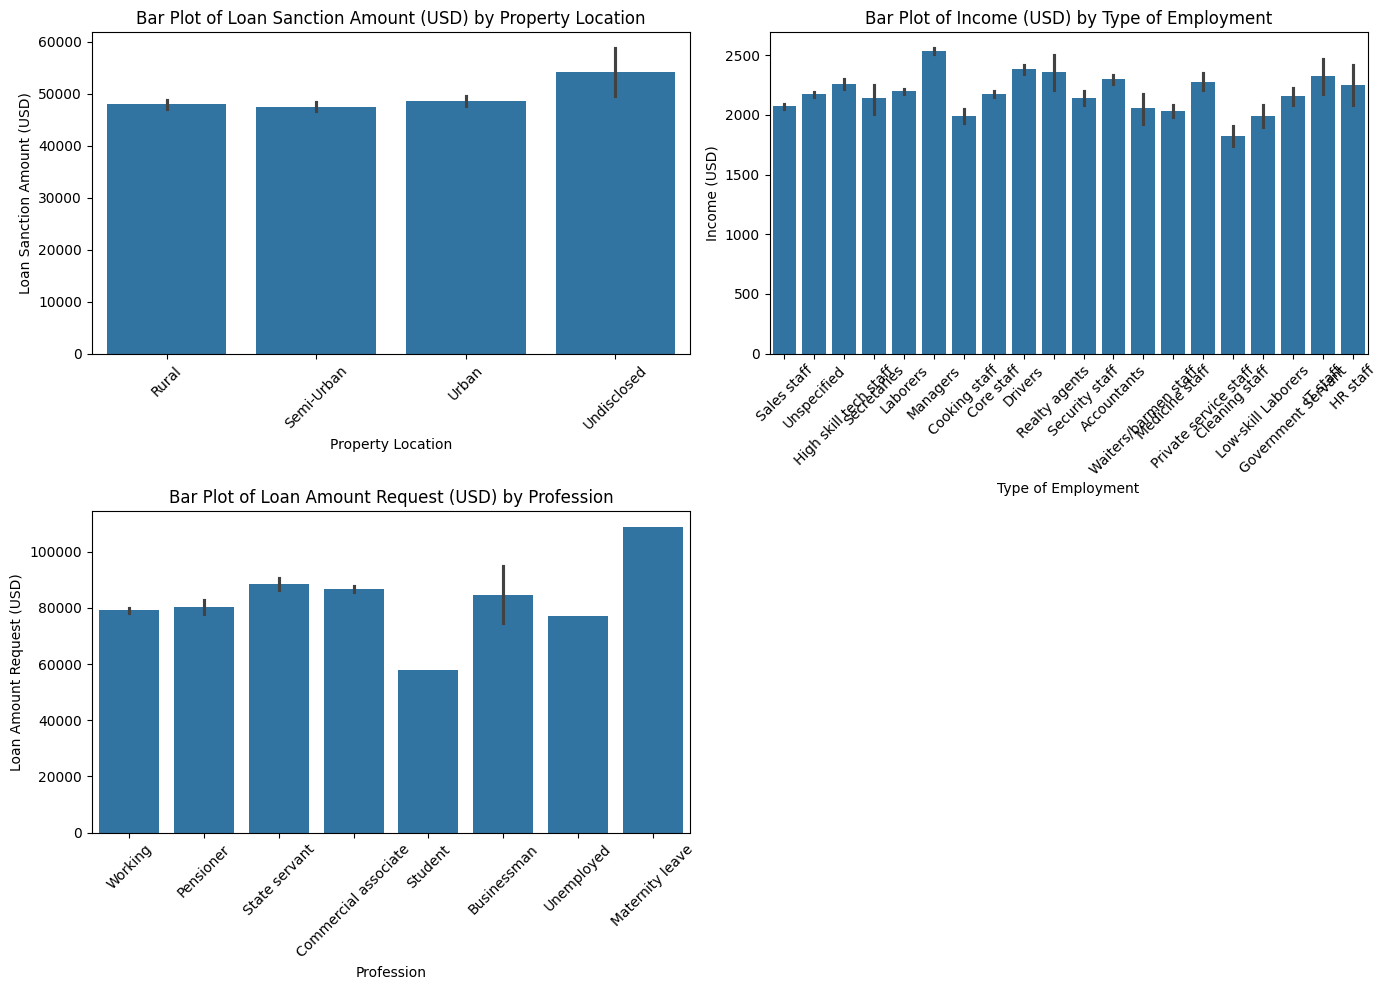

In [17]:
#Bivar analysis

# Load the original CSV file
df = pd.read_csv('Loan_final_cleaned.csv')

plt.figure(figsize=(15, 10))

# Income vs Loan Amount Request
plt.subplot(2, 3, 1)
sns.scatterplot(data=df, x='Income (USD)', y='Loan Amount Request (USD)')
plt.title('Scatterplot of Income vs Loan Amount Request')

# Income vs Loan Sanction Amount
plt.subplot(2, 3, 2)
sns.scatterplot(data=df, x='Income (USD)', y='Loan Sanction Amount (USD)')
plt.title('Income vs Loan Sanction Amount')

# Credit Score vs Loan Amount Request
plt.subplot(2, 3, 3)
sns.scatterplot(data=df, x='Credit Score', y='Loan Amount Request (USD)')
plt.title('Credit Score vs Loan Amount Request')

# Credit Score vs Loan Sanction Amount 
plt.subplot(2, 3, 4)
sns.scatterplot(data=df, x='Credit Score', y='Loan Sanction Amount (USD)')
plt.title('Credit Score vs Loan Sanction Amount')

# Income vs Credit Score
plt.subplot(2, 3, 5)
sns.scatterplot(data=df, x='Income (USD)', y='Credit Score')
plt.title('Income vs Credit Score')

plt.tight_layout()
plt.show()

# Bar Plot
plt.figure(figsize=(14, 10))

# Loan Sanction Amount (USD) by Property Location
plt.subplot(2, 2, 1)
sns.barplot(x='Property Location', y='Loan Sanction Amount (USD)', data=df)
plt.title('Bar Plot of Loan Sanction Amount (USD) by Property Location')
plt.xticks(rotation=45)

# Income (USD) by Type of Employment
plt.subplot(2, 2, 2)
sns.barplot(x='Type of Employment', y='Income (USD)', data=df)
plt.title('Bar Plot of Income (USD) by Type of Employment')
plt.xticks(rotation=45)

# Loan Amount Request (USD) by Profession
plt.subplot(2, 2, 3)
sns.barplot(x='Profession', y='Loan Amount Request (USD)', data=df)
plt.title('Bar Plot of Loan Amount Request (USD) by Profession')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<h2>Multivar Analysis</h2>

<h4>Complex Scatter Plots:</h4>

These plots visualize relationships involving three variables, providing a comprehensive view of interactions within the data.

•	Income vs Loan Amount Request vs Loan Sanction Amount: To examine how income and loan request relate to the sanctioned loan amount.

•	Credit Score vs Loan Amount Request vs Loan Sanction Amount: To explore the interaction between credit score, loan request, and sanctioned loan amount.

•	Income vs Current Loan Expenses vs Loan Amount Request: To see how income and current loan expenses influence the loan amount request.


<h4>Grouped Bar Plot:</h4>

Grouped bar plots show the relationship between multiple categorical variables and a numerical variable, highlighting differences across groups.

•	Income Stability vs Profession vs Loan Sanction Amount (USD): To compare the average loan sanction amount across different professions and income stability statuses.


<h4>Grouped Box Plots:</h4>

Box plots are used to display the distribution of a numerical variable across different categories, showing the spread, central tendency, and potential outliers.

•	Income (USD) by Type of Employment and Gender: To analyze the income distribution across different employment types and genders.

•	Current Loan Expenses (USD) by Income Stability and Property Type: To see the variation in current loan expenses across different income stability statuses and property types.



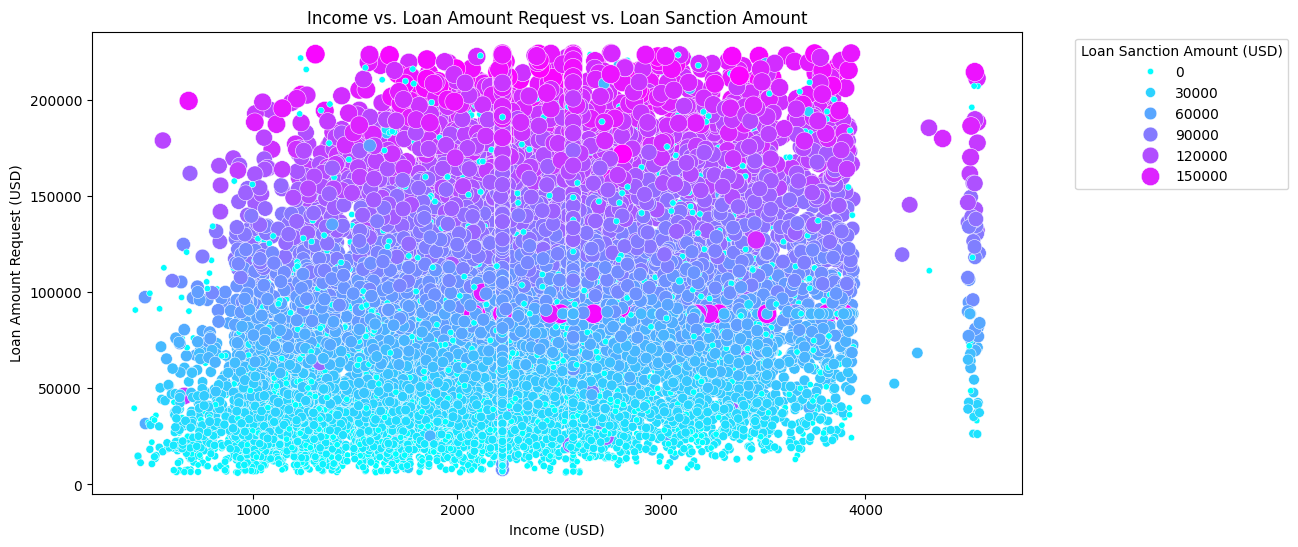

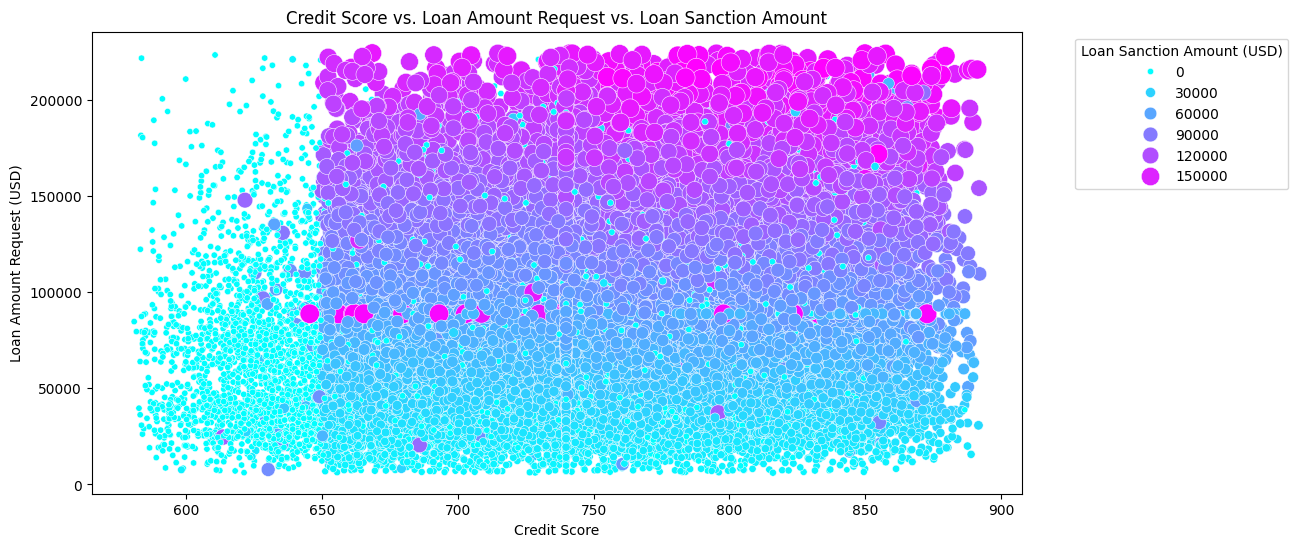

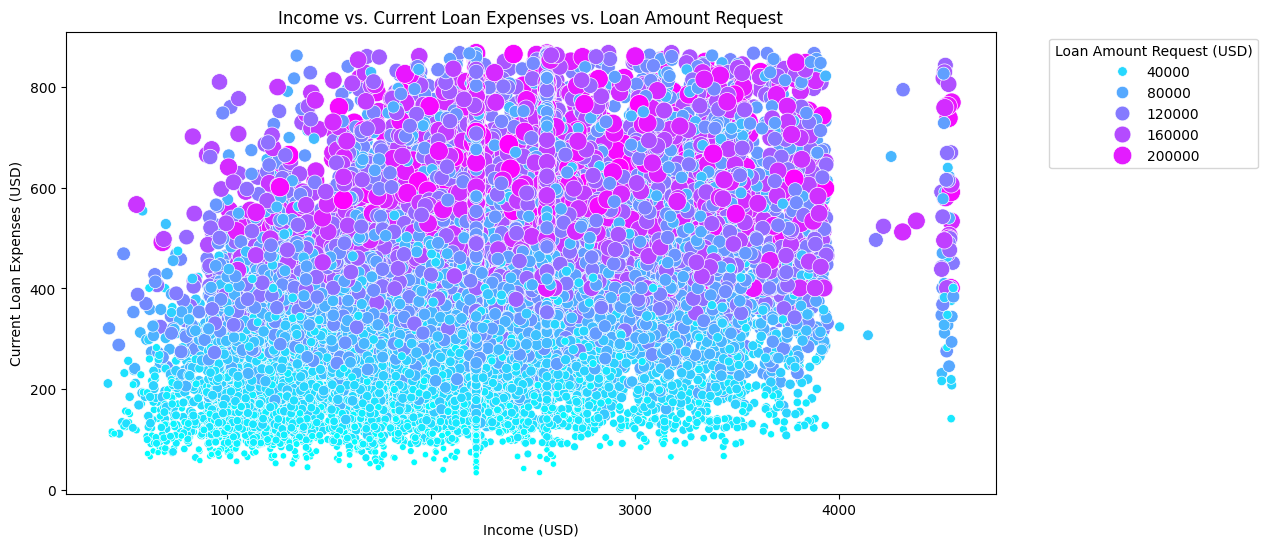

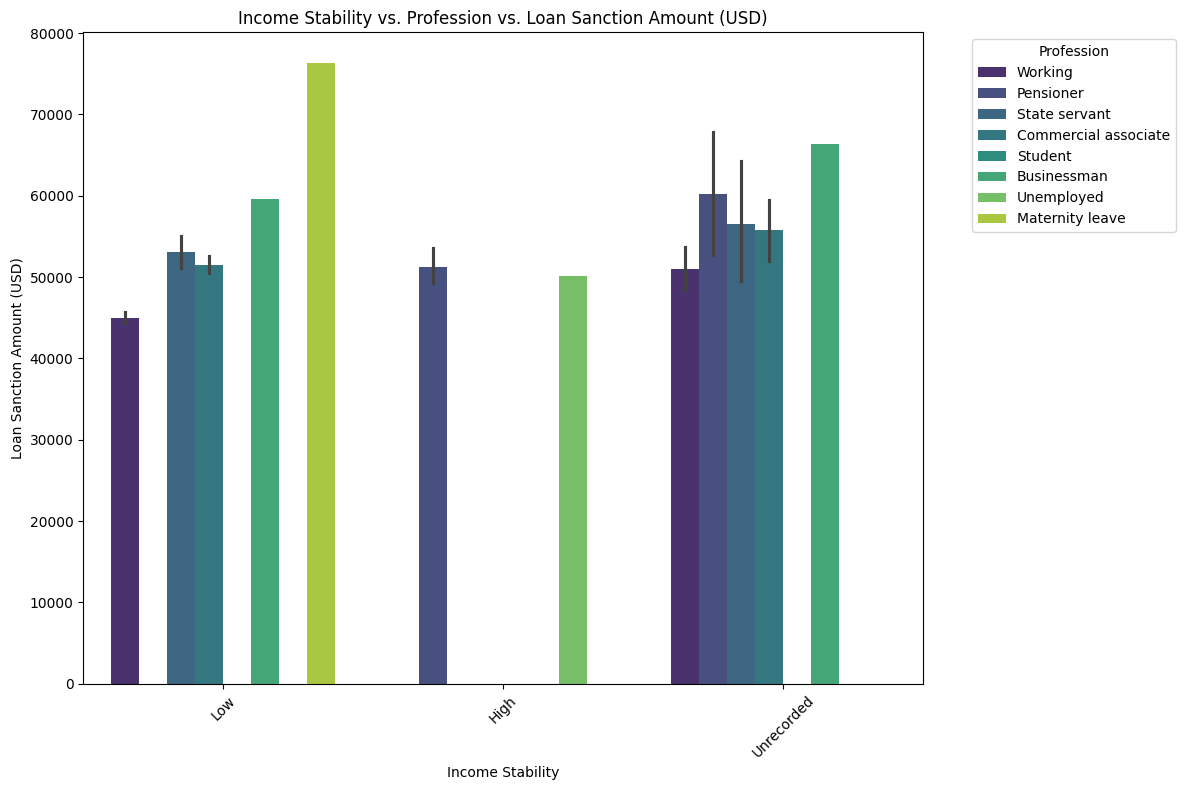

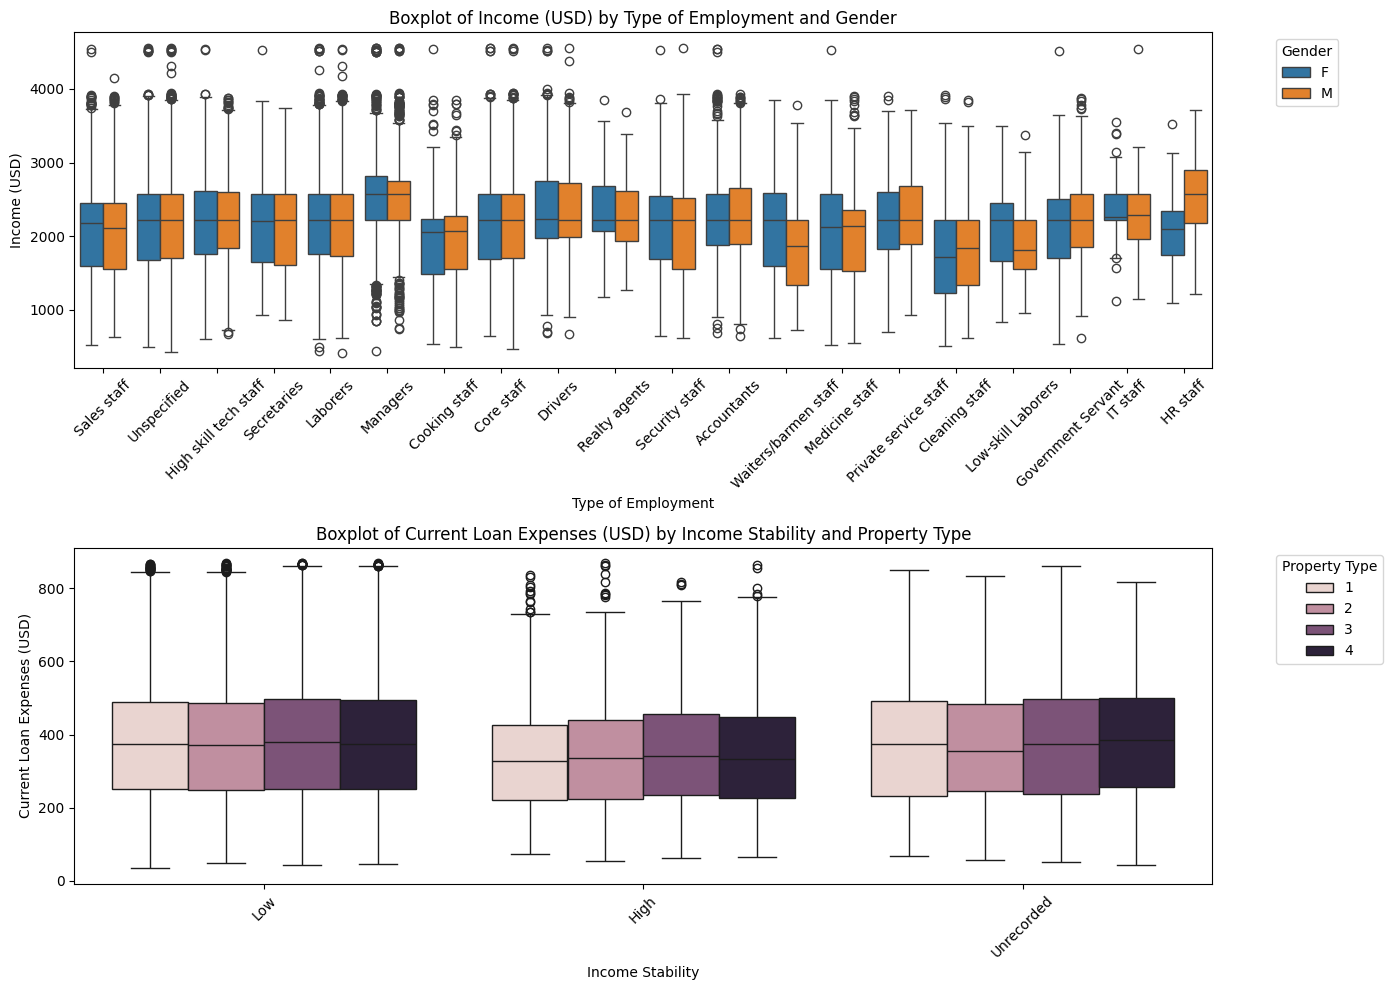

In [16]:
# Load the dataset
file_path = 'Loan_final_cleaned.csv'
data = pd.read_csv(file_path)

# Plotting Income vs. Loan Amount Request vs. Loan Sanction Amount
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=data, x='Income (USD)', y='Loan Amount Request (USD)', 
    size='Loan Sanction Amount (USD)', hue='Loan Sanction Amount (USD)', 
    palette='cool', sizes=(20, 200)
)
plt.title('Income vs. Loan Amount Request vs. Loan Sanction Amount')
plt.xlabel('Income (USD)')
plt.ylabel('Loan Amount Request (USD)')
plt.legend(title='Loan Sanction Amount (USD)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plotting Credit Score vs. Loan Amount Request vs. Loan Sanction Amount
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=data, x='Credit Score', y='Loan Amount Request (USD)', 
    size='Loan Sanction Amount (USD)', hue='Loan Sanction Amount (USD)', 
    palette='cool', sizes=(20, 200)
)
plt.title('Credit Score vs. Loan Amount Request vs. Loan Sanction Amount')
plt.xlabel('Credit Score')
plt.ylabel('Loan Amount Request (USD)')
plt.legend(title='Loan Sanction Amount (USD)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plotting Income vs. Current Loan Expenses vs. Loan Amount Request
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=data, x='Income (USD)', y='Current Loan Expenses (USD)', 
    size='Loan Amount Request (USD)', hue='Loan Amount Request (USD)', 
    palette='cool', sizes=(20, 200)
)
plt.title('Income vs. Current Loan Expenses vs. Loan Amount Request')
plt.xlabel('Income (USD)')
plt.ylabel('Current Loan Expenses (USD)')
plt.legend(title='Loan Amount Request (USD)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Income Stability vs. Profession vs. Loan Sanction Amount (USD)
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='Income Stability', y='Loan Sanction Amount (USD)', hue='Profession', 
    data=data, palette='viridis'
)
plt.title('Income Stability vs. Profession vs. Loan Sanction Amount (USD)')
plt.xlabel('Income Stability')
plt.ylabel('Loan Sanction Amount (USD)')
plt.xticks(rotation=45)
plt.legend(title='Profession', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Boxplot (Grouped)
plt.figure(figsize=(14, 10))

# Income (USD) by Type of Employment and Gender
plt.subplot(2, 1, 1)
boxplot1 = sns.boxplot(
    x='Type of Employment', y='Income (USD)', hue='Gender', data=data
)
plt.title('Boxplot of Income (USD) by Type of Employment and Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Current Loan Expenses (USD) by Income Stability and Property Type
plt.subplot(2, 1, 2)
boxplot2 = sns.boxplot(
    x='Income Stability', y='Current Loan Expenses (USD)', hue='Property Type', 
    data=data
)
plt.title('Boxplot of Current Loan Expenses (USD) by Income Stability and Property Type')
plt.xticks(rotation=45)
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
